## K means Algorithm

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy
import copy
from scipy.spatial.distance import euclidean

In [15]:
RANDOM_SEED=11
np.random.seed(RANDOM_SEED)

In [16]:
data=pd.read_csv('kmeans.csv')

In [17]:
data.shape

(3000, 2)

In [19]:
data.head()

,x1,x2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [78]:
class kmeans:

    def __init__(self,k,data): #k개만큼의 초기 center 값을 생성한다.
        self.centroids = {
        i+1: [np.random.randint(data.x1.min(), data.x1.max()), np.random.randint(data.x2.min(), data.x2.max())]
        for i in range(k)}
        self.colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'purple', 6:'cyan', 7:'m', 8:'gray',9:'pink',10:'olive'}
        self.dist_df=pd.DataFrame()
        self.old_centroids = 0

    def cal_dist(self): #초기 center 값들과 데이터 사이의 유클리디안 거리로 계산하여 새로운 df에 추가한다.
        for i in self.centroids.keys():
            # sqrt((x1 - x2)^2 - (y1 - y2)^2) - 유클리디안 거리
            self.dist_df['distance_from_{}'.format(i)] = ( # k 중심으로부터 거리를 구해 k로부터 거리라는 열을 추가한다.
                np.sqrt(
                    (data['x1'] - self.centroids[i][0]) ** 2
                    + (data['x2'] - self.centroids[i][1]) ** 2))
        self.dist_df['closest'] = self.dist_df.idxmin(axis=1) # 최소값을 closet에 저장한다.
        self.dist_df['closest'] = self.dist_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))

    def get_clt(self):
        while self.old_centroids != self.centroids : # 이전 center 값들을 저장해두고 변하는 center 값들과 비교해 더 이상 변하지않으면
                                                        # 즉 두 center 값 사이 거리가 0이면 반복을 중단하는 while문이다.
            self.old_centroids = copy.deepcopy(self.centroids)

            for i in self.centroids.keys(): # 거리의 평균(center) 값으로 각각 값을 업데이트 시켜준다..
                self.centroids[i][0] = np.mean(data[self.dist_df['closest'] == i]['x1'])
                self.centroids[i][1] = np.mean(data[self.dist_df['closest'] == i]['x2'])
                
            for i in self.centroids.keys(): # 위와 같은 방식으로 새로운 center와의 거리를 구해 다시 저장한다.
                self.dist_df['distance_from_{}'.format(i)] =  (np.sqrt((data['x1'] - self.centroids[i][0]) ** 2+ (data['x2'] - self.centroids[i][1]) ** 2))
            self.dist_df['closest'] = self.dist_df.drop(['closest'],axis=1).idxmin(axis=1)
            self.dist_df['closest'] = self.dist_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
        self.dist_df['x1']=data['x1']
        self.dist_df['x2']=data['x2']
            
    def get_scatter(self): # k개의 군집별로 다른 색의 그래프를 그린다.
        fig = plt.figure()
        ax = plt.axes()
        for i in self.centroids.keys():
            tmp_df=self.dist_df.query('closest=={}'.format(i)) # query를 통해 k 가 i인 군집별로 따로 그래프로 출력한다.
            plt.scatter(tmp_df['x1'], tmp_df['x2'], alpha=0.2 ,color=self.colmap[i])
        for i in self.centroids.keys():
            plt.scatter(*self.centroids[i], color=self.colmap[i], edgecolors='black')
        plt.show()
        
    def heter(self): #헤테로제네티스 구하기 
        dist_lst=[]
        for i in range(0,self.dist_df.shape[0]):
            closest=self.dist_df.closest[i] # 데이터 하나씩에 대해 가장 가까운 군집의 센터를 저장한다.
            dist_lst.append(self.dist_df['distance_from_{}'.format(closest)][i]) # 해당 군집과의 거리를 리스트에 저장한다.
        self.dist_df['distances']=dist_lst # 그 거리를 리스트에 저장한다.
        return sum(self.dist_df.distances) # 총 합을 반환한다.

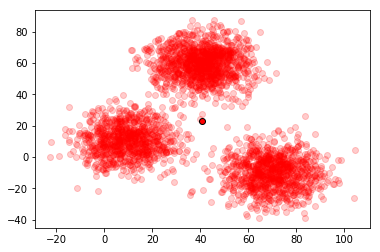

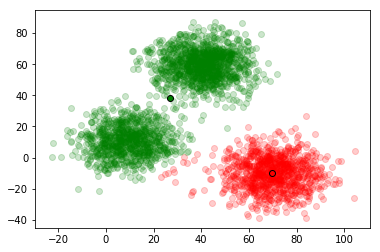

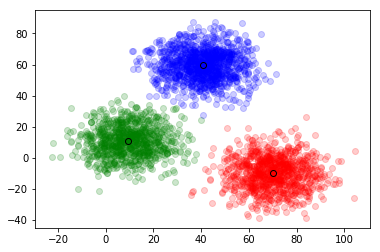

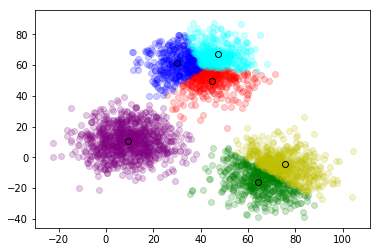

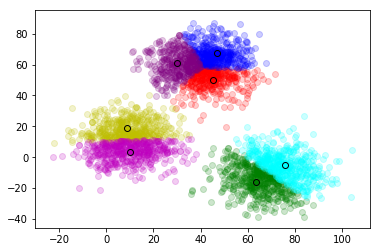

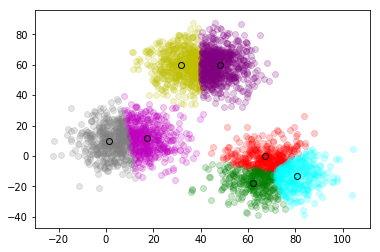

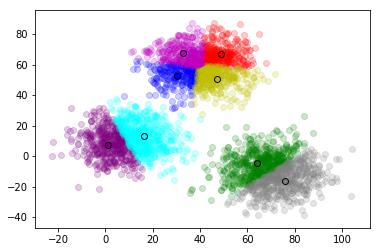

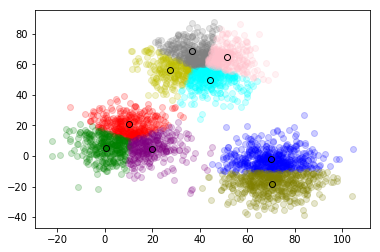

In [81]:
dist_lst=[]
check_lst=[1,2,3,6,7,8,9,10]
for i in check_lst:
    obj=kmeans(i,data)
    obj.cal_dist()
    obj.get_clt()
    obj.get_scatter()
    dist_lst.append(obj.heter())

In [85]:
for i in range(0,len(check_lst)):
    print("k={}'s hetergeneities is {}".format(check_lst[i],dist_lst[i]))

k=1's hetergeneities is 118573.04301584771
k=2's hetergeneities is 74779.93285644591
k=3's hetergeneities is 38012.70271413333
k=6's hetergeneities is 30813.982877700324
k=7's hetergeneities is 28791.686803762357
k=8's hetergeneities is 28948.054685109466
k=9's hetergeneities is 27643.548398011397
k=10's hetergeneities is 25978.473678279115
